In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm

from load_graph import *

In [2]:
def communities(comms):
    communities = defaultdict(set)
    for i, coms in enumerate(comms):
        for c in coms:
            communities[c].add(i)
    return list(communities.values())

def get_overlap_densities(g, coms, LARGE=50):
    large_overlaps = set()
    for i in range(len(coms)):
        for j in range(i):
            intersection_size = len(coms[i].intersection(coms[j]))
            if (intersection_size >= LARGE
                and intersection_size < len(coms[i])/2 
                and intersection_size < len(coms[j])/2 ):
                large_overlaps.add((i,j))

    small_density = []
    large_density = []
    intersection_density = []
    for k, (i,j) in enumerate(tqdm(large_overlaps)):
        if len(coms[i]) < len(coms[j]):
            small_com = coms[i]
            large_com = coms[j]
        else:
            small_com = coms[j]
            large_com = coms[i]
        intersection = small_com.intersection(large_com)
        
        for c, data in zip([small_com, large_com, intersection], [small_density, large_density, intersection_density]):
            sg = g.subgraph(c)
            density = 2*sg.ecount() / (sg.vcount()*(sg.vcount())-1)
            data.append(density)
    return small_density, large_density, intersection_density


def make_plot(graph_name, d, rhos, plot_name, LARGE=10):
    small_densities = []
    large_densities = []
    intersection_densities = []
    empirical_rhos = []

    for rho in rhos:
        g, coms = load_abcdoo(f"{graph_name}_d{d}_rho{rho}_edge.dat", f"{graph_name}_d{d}_rho{rho}_com.dat")
        # Compute Overlap Densities
        s,l,i = get_overlap_densities(g, coms, LARGE=LARGE)
        small_densities.append(s)
        large_densities.append(l)
        intersection_densities.append(i)
        # Compute Empirical Rho
        coms_per_node = np.array([len(c) for c in g.vs["comms"]])
        degrees = np.array(g.degree())
        empirical_rhos.append(np.corrcoef(degrees, coms_per_node)[0, 1])
    
    ms = np.array([np.median(x) for x in small_densities])
    ml = np.array([np.median(x) for x in large_densities])
    mi = np.array([np.median(x) for x in intersection_densities])

    q25s = np.array([np.quantile(x, 0.25) for x in small_densities])
    q25l = np.array([np.quantile(x, 0.25) for x in large_densities])
    q25i = np.array([np.quantile(x, 0.25) for x in intersection_densities])

    q75s = np.array([np.quantile(x, 0.75) for x in small_densities])
    q75l = np.array([np.quantile(x, 0.75) for x in large_densities])
    q75i = np.array([np.quantile(x, 0.75) for x in intersection_densities])

    # Sort Empirical_rhos to make plot nicer
    empirical_rhos = np.array(empirical_rhos)
    s = np.argsort(empirical_rhos)

    plt.plot(empirical_rhos[s], ms[s], label="Small")
    plt.plot(empirical_rhos[s], ml[s], label="Large")
    plt.plot(empirical_rhos[s], mi[s], label="Intersection")

    plt.fill_between(empirical_rhos[s], q25s[s], q75s[s], alpha=0.33)
    plt.fill_between(empirical_rhos[s], q25l[s], q75l[s], alpha=0.33)
    plt.fill_between(empirical_rhos[s], q25i[s], q75i[s], alpha=0.33)

    plt.legend()
    plt.xlabel(r"$\rho$", fontsize=15)
    plt.ylabel("Density", fontsize=15)
    plt.tick_params(labelsize=12)
    plt.title(plot_name, fontsize=16)
    fig = plt.gcf()
    fig.set_dpi(140)
    plt.show()

## Youtube-Like

100%|██████████| 1201/1201 [00:00<00:00, 3526.95it/s]


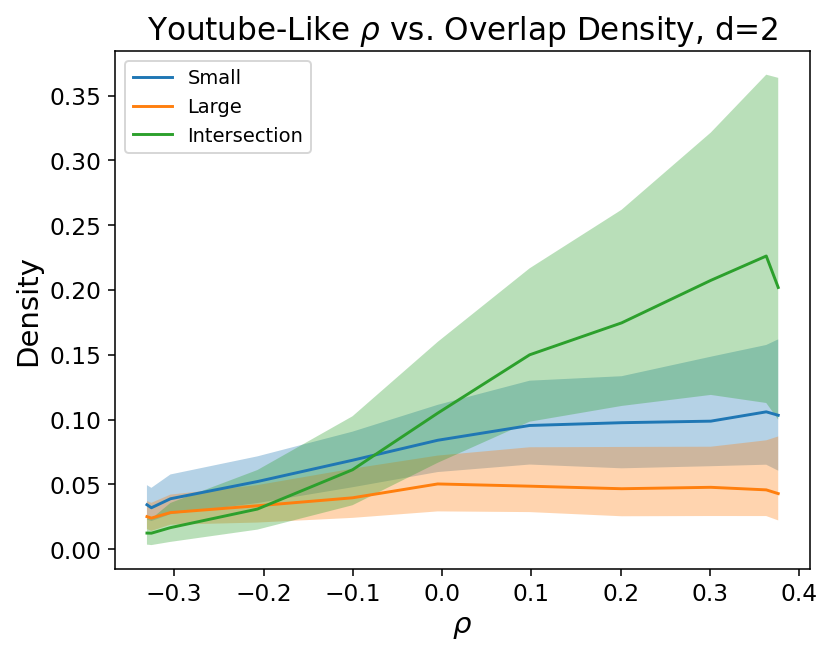

In [3]:
d=2
name="data/abcdoo_youtube"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos, r"Youtube-Like $\rho$ vs. Overlap Density, d=2")

100%|██████████| 2457/2457 [00:02<00:00, 844.51it/s]


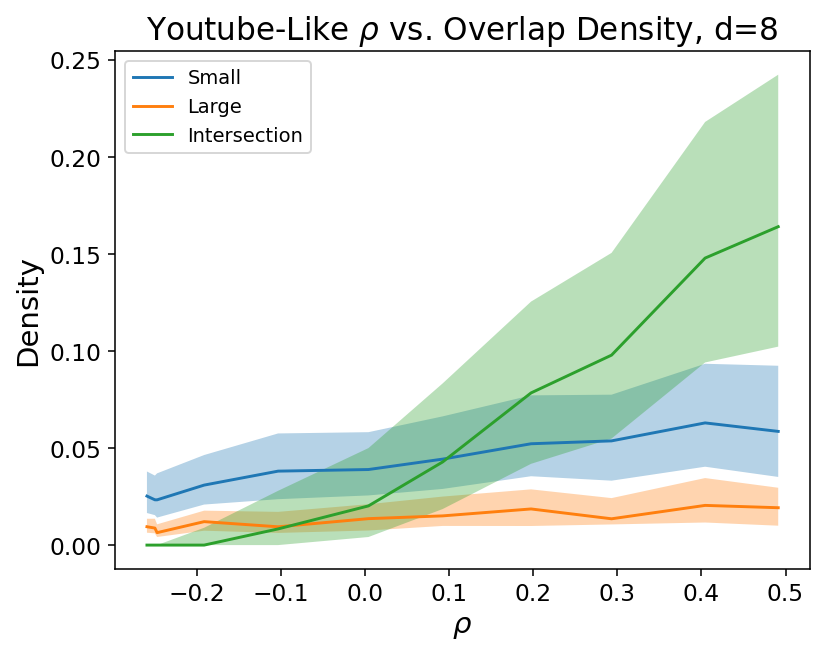

In [4]:
d=8
name="data/abcdoo_youtube"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos, r"Youtube-Like $\rho$ vs. Overlap Density, d=8")

100%|██████████| 8088/8088 [00:12<00:00, 631.04it/s]


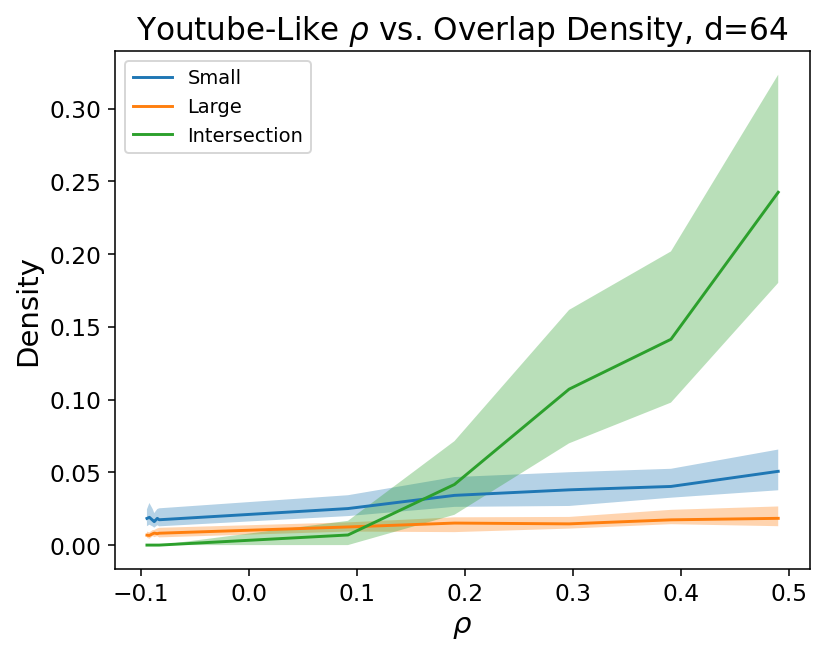

In [5]:
d=64
name="data/abcdoo_youtube"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos, r"Youtube-Like $\rho$ vs. Overlap Density, d=64")

## DBLP-Like

100%|██████████| 5650/5650 [00:05<00:00, 1038.11it/s]


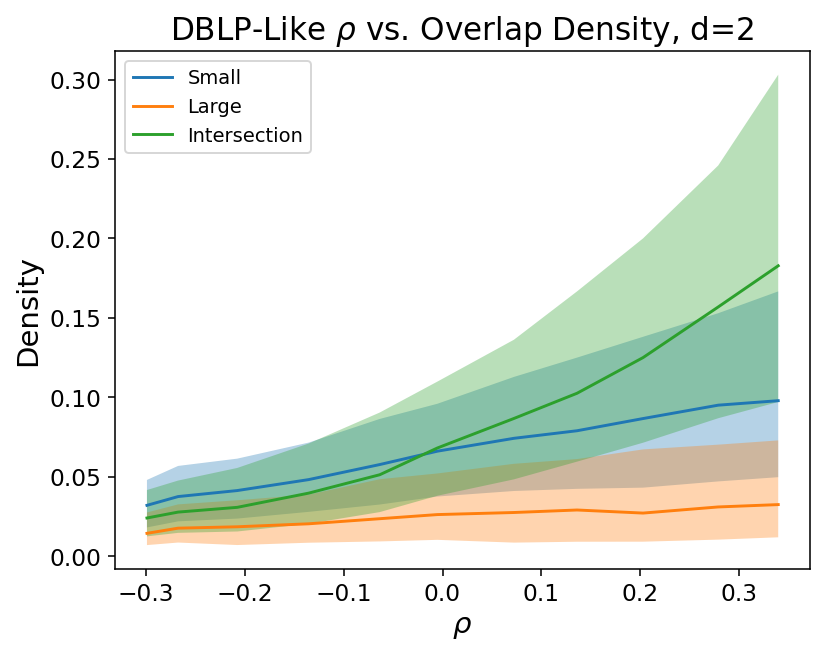

In [6]:
d=2
name="data/abcdoo_dblp"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos, r"DBLP-Like $\rho$ vs. Overlap Density, d=2")

100%|██████████| 17211/17211 [00:30<00:00, 570.09it/s]


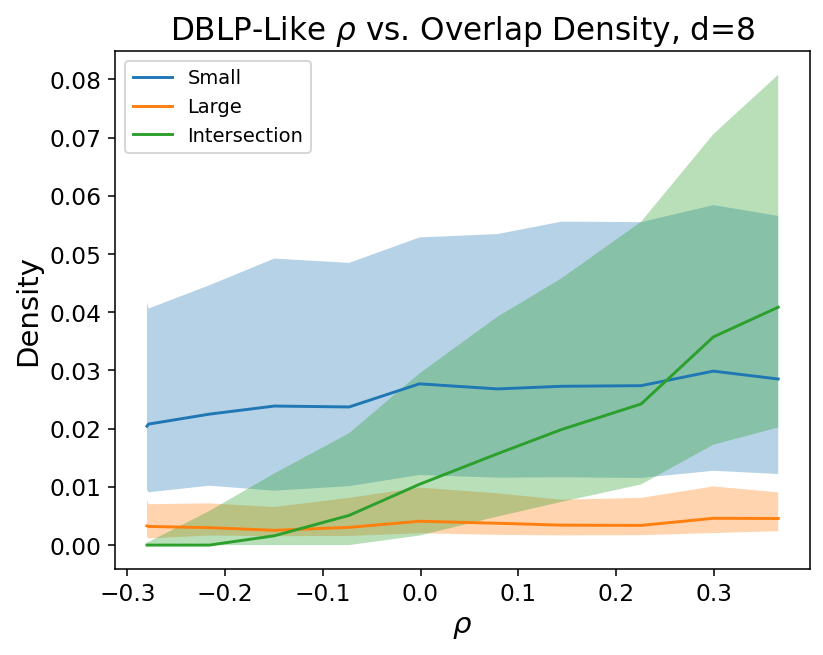

In [7]:
d=8
name="data/abcdoo_dblp"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos, r"DBLP-Like $\rho$ vs. Overlap Density, d=8")

100%|██████████| 83366/83366 [02:59<00:00, 463.79it/s]


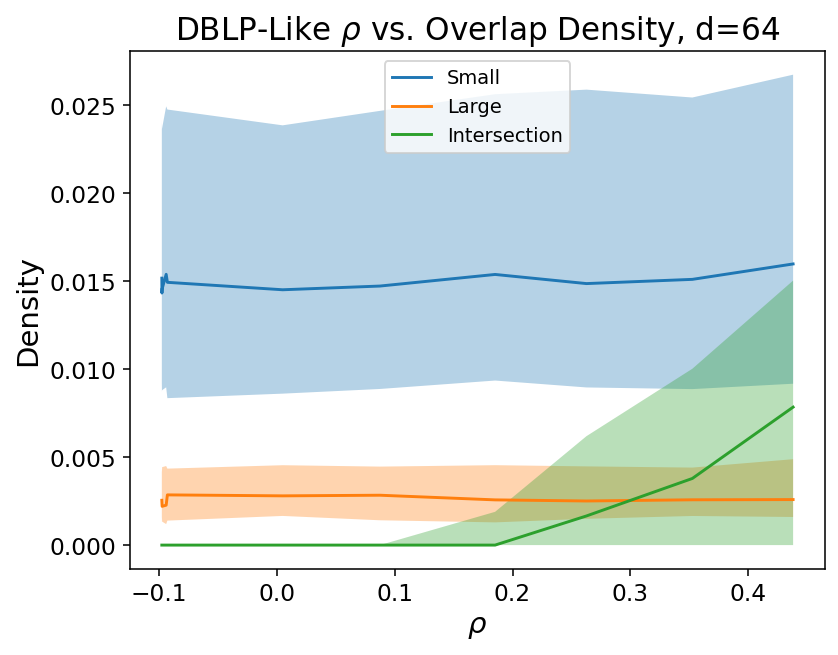

In [8]:
d=64
name="data/abcdoo_dblp"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos, r"DBLP-Like $\rho$ vs. Overlap Density, d=64")

## Amazon-Like

100%|██████████| 31474/31474 [00:25<00:00, 1212.08it/s]


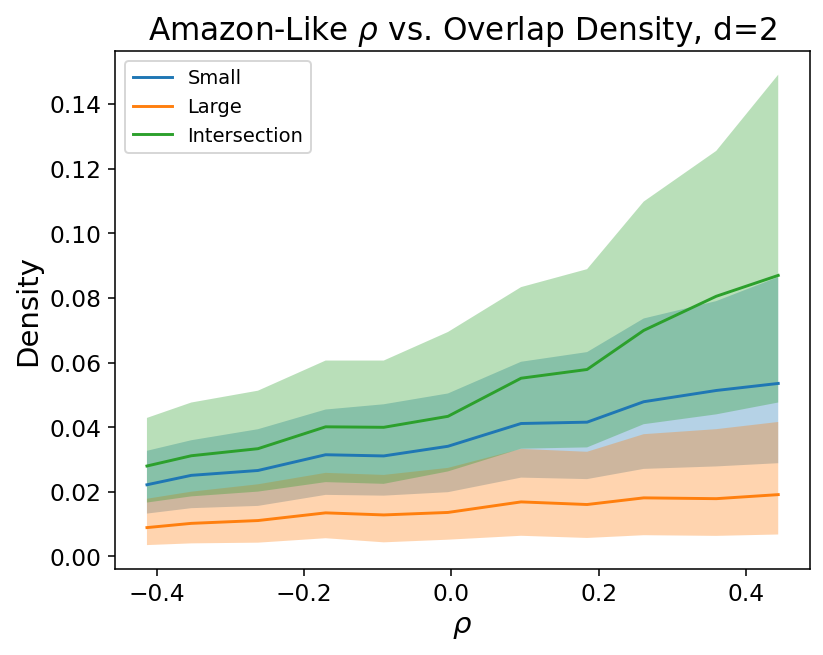

In [9]:
d=2
name="data/abcdoo_amazon"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos, r"Amazon-Like $\rho$ vs. Overlap Density, d=2")

100%|██████████| 123430/123430 [05:03<00:00, 407.25it/s]


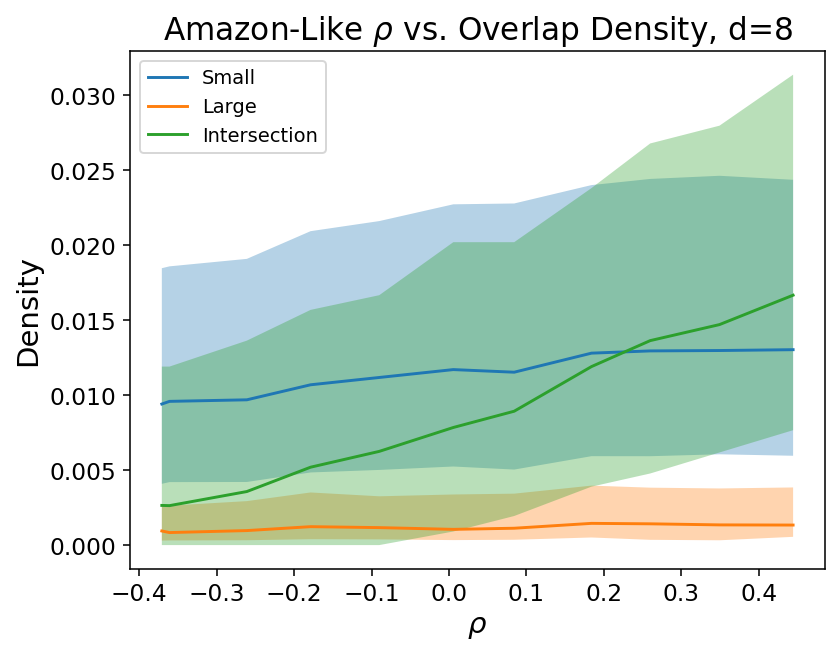

In [10]:
d=8
name="data/abcdoo_amazon"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos, r"Amazon-Like $\rho$ vs. Overlap Density, d=8")

100%|██████████| 405961/405961 [21:35<00:00, 313.44it/s]


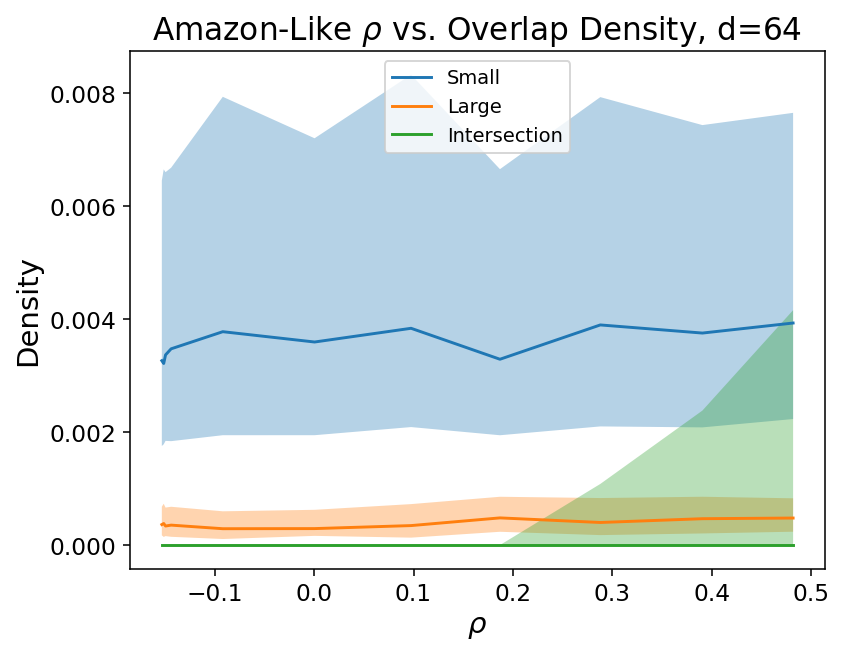

In [11]:
d=64
name="data/abcdoo_amazon"
rhos = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
make_plot(name, d, rhos, r"Amazon-Like $\rho$ vs. Overlap Density, d=64")